In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Standarized_Data/"
workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Lab_Env_Training/"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
#DataSetPath = workingDirectory + "/DataSet_Standarization"
#DataSetPath = workingDirectory + "/DataSet_OriginalForm"
TrainingSetPath = workingDirectory + "/DataSet/"+"TrainingSet"
#ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
#TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "ML_Models/" + "Lab_Terrain"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /home/jiayu/Desktop/MLP_DataSet/Lab_Env_Training/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jiayu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [4]:
#Load DataSet File

#dataset_file = DataSetPath + "/data_rubbles"+'.p'
trainingset_file = TrainingSetPath + "/data"+'.p'
trainingset = pickle.load(open(trainingset_file,"rb"))

#validationset_file = ValidationSetPath + "/data"+'.p'
#validationset = pickle.load(open(validationset_file,"rb"))

#testset_file = TestSetPath + "/data"+'.p'
#testset = pickle.load(open(testset_file,"rb"))

print("Set Up for Training Set")
print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
print("Pre Process Mode: ",trainingset["PreProcessMode"])

print(" ")

# print("Set Up for Validation Set")
# print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
# print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
# print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
# print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
# print("Pre Process Mode: ",validationset["PreProcessMode"])

# print(" ")

# print("Set Up for Test Set")
# print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
# print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
# print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
# print("Number of Preview Steps: ", testset["NumPreviewSteps"])
# print("Pre Process Mode: ",testset["PreProcessMode"])

Set Up for Training Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 


In [5]:
#Test Train Split, for now No Test data
#x_train, x_test, y_train, y_test = train_test_split(dataset["input"], dataset["output"], test_size = 0.01)
x_train = trainingset["input"]
y_train = trainingset["output"]

# x_valid = validationset["input"]
# y_valid = validationset["output"]

# x_test = testset["input"]
# y_test = testset["output"]

#Get Left Foot to see
#x_train=x_train[::2]
#y_train=y_train[::2]


#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

print("Num of Data Points: ", x_train.shape[0])

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("X shape: ", x_train.shape)
# print("y shape: ", y_train.shape)

input dim:  85
output dim: 11
 
Num of Data Points:  6


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,)), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
from tensorflow.keras.losses import Huber

#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse') #0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=Huber(delta=3.0))


#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
history = model.fit(x = x_train, y = y_train, epochs = 5000, batch_size = 1280) #,validation_data = (x_valid, y_valid)) #1280, 1000 epoch

Epoch 1/5000
6/6 [==============================] - 0s 45ms/sample - loss: 0.1325
Epoch 2/5000
6/6 [==============================] - 0s 215us/sample - loss: 0.1266
Epoch 3/5000
6/6 [==============================] - 0s 233us/sample - loss: 0.1207
Epoch 4/5000
6/6 [==============================] - 0s 254us/sample - loss: 0.1150
Epoch 5/5000
6/6 [==============================] - 0s 574us/sample - loss: 0.1093
Epoch 6/5000
6/6 [==============================] - 0s 397us/sample - loss: 0.1036
Epoch 7/5000
6/6 [==============================] - 0s 398us/sample - loss: 0.0981
Epoch 8/5000
6/6 [==============================] - 0s 521us/sample - loss: 0.0928
Epoch 9/5000
6/6 [==============================] - 0s 379us/sample - loss: 0.0877
Epoch 10/5000
6/6 [==============================] - 0s 353us/sample - loss: 0.0828
Epoch 11/5000
6/6 [==============================] - 0s 377us/sample - loss: 0.0781
Epoch 12/5000
6/6 [==============================] - 0s 339us/sample - loss: 0.0734
Ep

Epoch 97/5000
6/6 [==============================] - 0s 294us/sample - loss: 2.5649e-04
Epoch 98/5000
6/6 [==============================] - 0s 333us/sample - loss: 2.5243e-04
Epoch 99/5000
6/6 [==============================] - 0s 283us/sample - loss: 2.4863e-04
Epoch 100/5000
6/6 [==============================] - 0s 340us/sample - loss: 2.4515e-04
Epoch 101/5000
6/6 [==============================] - 0s 321us/sample - loss: 2.4190e-04
Epoch 102/5000
6/6 [==============================] - 0s 325us/sample - loss: 2.3882e-04
Epoch 103/5000
6/6 [==============================] - 0s 290us/sample - loss: 2.3595e-04
Epoch 104/5000
6/6 [==============================] - 0s 233us/sample - loss: 2.3327e-04
Epoch 105/5000
6/6 [==============================] - 0s 208us/sample - loss: 2.3076e-04
Epoch 106/5000
6/6 [==============================] - 0s 219us/sample - loss: 2.2836e-04
Epoch 107/5000
6/6 [==============================] - 0s 232us/sample - loss: 2.2592e-04
Epoch 108/5000
6/6 [====

6/6 [==============================] - 0s 222us/sample - loss: 1.5882e-04
Epoch 190/5000
6/6 [==============================] - 0s 206us/sample - loss: 1.5855e-04
Epoch 191/5000
6/6 [==============================] - 0s 278us/sample - loss: 1.5829e-04
Epoch 192/5000
6/6 [==============================] - 0s 243us/sample - loss: 1.5803e-04
Epoch 193/5000
6/6 [==============================] - 0s 328us/sample - loss: 1.5777e-04
Epoch 194/5000
6/6 [==============================] - 0s 303us/sample - loss: 1.5752e-04
Epoch 195/5000
6/6 [==============================] - 0s 283us/sample - loss: 1.5727e-04
Epoch 196/5000
6/6 [==============================] - 0s 297us/sample - loss: 1.5702e-04
Epoch 197/5000
6/6 [==============================] - 0s 223us/sample - loss: 1.5678e-04
Epoch 198/5000
6/6 [==============================] - 0s 222us/sample - loss: 1.5653e-04
Epoch 199/5000
6/6 [==============================] - 0s 207us/sample - loss: 1.5629e-04
Epoch 200/5000
6/6 [================

Epoch 282/5000
6/6 [==============================] - 0s 195us/sample - loss: 1.3992e-04
Epoch 283/5000
6/6 [==============================] - 0s 203us/sample - loss: 1.3974e-04
Epoch 284/5000
6/6 [==============================] - 0s 172us/sample - loss: 1.3956e-04
Epoch 285/5000
6/6 [==============================] - 0s 228us/sample - loss: 1.3938e-04
Epoch 286/5000
6/6 [==============================] - 0s 215us/sample - loss: 1.3921e-04
Epoch 287/5000
6/6 [==============================] - 0s 194us/sample - loss: 1.3903e-04
Epoch 288/5000
6/6 [==============================] - 0s 226us/sample - loss: 1.3885e-04
Epoch 289/5000
6/6 [==============================] - 0s 216us/sample - loss: 1.3867e-04
Epoch 290/5000
6/6 [==============================] - 0s 227us/sample - loss: 1.3850e-04
Epoch 291/5000
6/6 [==============================] - 0s 217us/sample - loss: 1.3832e-04
Epoch 292/5000
6/6 [==============================] - 0s 257us/sample - loss: 1.3814e-04
Epoch 293/5000
6/6 [=

6/6 [==============================] - 0s 242us/sample - loss: 1.2421e-04
Epoch 375/5000
6/6 [==============================] - 0s 251us/sample - loss: 1.2404e-04
Epoch 376/5000
6/6 [==============================] - 0s 216us/sample - loss: 1.2387e-04
Epoch 377/5000
6/6 [==============================] - 0s 228us/sample - loss: 1.2369e-04
Epoch 378/5000
6/6 [==============================] - 0s 226us/sample - loss: 1.2353e-04
Epoch 379/5000
6/6 [==============================] - 0s 225us/sample - loss: 1.2335e-04
Epoch 380/5000
6/6 [==============================] - 0s 224us/sample - loss: 1.2318e-04
Epoch 381/5000
6/6 [==============================] - 0s 227us/sample - loss: 1.2301e-04
Epoch 382/5000
6/6 [==============================] - 0s 222us/sample - loss: 1.2284e-04
Epoch 383/5000
6/6 [==============================] - 0s 262us/sample - loss: 1.2267e-04
Epoch 384/5000
6/6 [==============================] - 0s 267us/sample - loss: 1.2250e-04
Epoch 385/5000
6/6 [================

Epoch 467/5000
6/6 [==============================] - 0s 231us/sample - loss: 1.0723e-04
Epoch 468/5000
6/6 [==============================] - 0s 230us/sample - loss: 1.0703e-04
Epoch 469/5000
6/6 [==============================] - 0s 213us/sample - loss: 1.0683e-04
Epoch 470/5000
6/6 [==============================] - 0s 209us/sample - loss: 1.0664e-04
Epoch 471/5000
6/6 [==============================] - 0s 211us/sample - loss: 1.0644e-04
Epoch 472/5000
6/6 [==============================] - 0s 233us/sample - loss: 1.0625e-04
Epoch 473/5000
6/6 [==============================] - 0s 221us/sample - loss: 1.0605e-04
Epoch 474/5000
6/6 [==============================] - 0s 297us/sample - loss: 1.0585e-04
Epoch 475/5000
6/6 [==============================] - 0s 263us/sample - loss: 1.0565e-04
Epoch 476/5000
6/6 [==============================] - 0s 258us/sample - loss: 1.0545e-04
Epoch 477/5000
6/6 [==============================] - 0s 215us/sample - loss: 1.0525e-04
Epoch 478/5000
6/6 [=

6/6 [==============================] - 0s 234us/sample - loss: 8.7485e-05
Epoch 560/5000
6/6 [==============================] - 0s 272us/sample - loss: 8.7238e-05
Epoch 561/5000
6/6 [==============================] - 0s 234us/sample - loss: 8.7003e-05
Epoch 562/5000
6/6 [==============================] - 0s 270us/sample - loss: 8.6769e-05
Epoch 563/5000
6/6 [==============================] - 0s 269us/sample - loss: 8.6533e-05
Epoch 564/5000
6/6 [==============================] - 0s 259us/sample - loss: 8.6297e-05
Epoch 565/5000
6/6 [==============================] - 0s 227us/sample - loss: 8.6060e-05
Epoch 566/5000
6/6 [==============================] - 0s 217us/sample - loss: 8.5822e-05
Epoch 567/5000
6/6 [==============================] - 0s 310us/sample - loss: 8.5584e-05
Epoch 568/5000
6/6 [==============================] - 0s 221us/sample - loss: 8.5345e-05
Epoch 569/5000
6/6 [==============================] - 0s 265us/sample - loss: 8.5106e-05
Epoch 570/5000
6/6 [================

Epoch 652/5000
6/6 [==============================] - 0s 310us/sample - loss: 6.1612e-05
Epoch 653/5000
6/6 [==============================] - 0s 256us/sample - loss: 6.1326e-05
Epoch 654/5000
6/6 [==============================] - 0s 228us/sample - loss: 6.1041e-05
Epoch 655/5000
6/6 [==============================] - 0s 207us/sample - loss: 6.0744e-05
Epoch 656/5000
6/6 [==============================] - 0s 221us/sample - loss: 6.0443e-05
Epoch 657/5000
6/6 [==============================] - 0s 250us/sample - loss: 6.0144e-05
Epoch 658/5000
6/6 [==============================] - 0s 235us/sample - loss: 5.9848e-05
Epoch 659/5000
6/6 [==============================] - 0s 222us/sample - loss: 5.9553e-05
Epoch 660/5000
6/6 [==============================] - 0s 222us/sample - loss: 5.9261e-05
Epoch 661/5000
6/6 [==============================] - 0s 224us/sample - loss: 5.8969e-05
Epoch 662/5000
6/6 [==============================] - 0s 229us/sample - loss: 5.8698e-05
Epoch 663/5000
6/6 [=

Epoch 745/5000
6/6 [==============================] - 0s 235us/sample - loss: 3.5770e-05
Epoch 746/5000
6/6 [==============================] - 0s 270us/sample - loss: 3.5512e-05
Epoch 747/5000
6/6 [==============================] - 0s 263us/sample - loss: 3.5255e-05
Epoch 748/5000
6/6 [==============================] - 0s 231us/sample - loss: 3.4997e-05
Epoch 749/5000
6/6 [==============================] - 0s 266us/sample - loss: 3.4740e-05
Epoch 750/5000
6/6 [==============================] - 0s 303us/sample - loss: 3.4485e-05
Epoch 751/5000
6/6 [==============================] - 0s 226us/sample - loss: 3.4228e-05
Epoch 752/5000
6/6 [==============================] - 0s 202us/sample - loss: 3.3974e-05
Epoch 753/5000
6/6 [==============================] - 0s 205us/sample - loss: 3.3728e-05
Epoch 754/5000
6/6 [==============================] - 0s 207us/sample - loss: 3.3468e-05
Epoch 755/5000
6/6 [==============================] - 0s 210us/sample - loss: 3.3217e-05
Epoch 756/5000
6/6 [=

6/6 [==============================] - 0s 244us/sample - loss: 1.5698e-05
Epoch 838/5000
6/6 [==============================] - 0s 231us/sample - loss: 1.5529e-05
Epoch 839/5000
6/6 [==============================] - 0s 335us/sample - loss: 1.5363e-05
Epoch 840/5000
6/6 [==============================] - 0s 295us/sample - loss: 1.5198e-05
Epoch 841/5000
6/6 [==============================] - 0s 214us/sample - loss: 1.5035e-05
Epoch 842/5000
6/6 [==============================] - 0s 202us/sample - loss: 1.4869e-05
Epoch 843/5000
6/6 [==============================] - 0s 208us/sample - loss: 1.4707e-05
Epoch 844/5000
6/6 [==============================] - 0s 199us/sample - loss: 1.4545e-05
Epoch 845/5000
6/6 [==============================] - 0s 211us/sample - loss: 1.4386e-05
Epoch 846/5000
6/6 [==============================] - 0s 221us/sample - loss: 1.4225e-05
Epoch 847/5000
6/6 [==============================] - 0s 279us/sample - loss: 1.4069e-05
Epoch 848/5000
6/6 [================

Epoch 930/5000
6/6 [==============================] - 0s 214us/sample - loss: 4.8669e-06
Epoch 931/5000
6/6 [==============================] - 0s 223us/sample - loss: 4.7972e-06
Epoch 932/5000
6/6 [==============================] - 0s 238us/sample - loss: 4.7281e-06
Epoch 933/5000
6/6 [==============================] - 0s 257us/sample - loss: 4.6611e-06
Epoch 934/5000
6/6 [==============================] - 0s 257us/sample - loss: 4.5939e-06
Epoch 935/5000
6/6 [==============================] - 0s 297us/sample - loss: 4.5281e-06
Epoch 936/5000
6/6 [==============================] - 0s 350us/sample - loss: 4.4629e-06
Epoch 937/5000
6/6 [==============================] - 0s 285us/sample - loss: 4.3983e-06
Epoch 938/5000
6/6 [==============================] - 0s 313us/sample - loss: 4.3363e-06
Epoch 939/5000
6/6 [==============================] - 0s 287us/sample - loss: 4.2721e-06
Epoch 940/5000
6/6 [==============================] - 0s 309us/sample - loss: 4.2104e-06
Epoch 941/5000
6/6 [=

Epoch 1022/5000
6/6 [==============================] - 0s 225us/sample - loss: 1.1604e-06
Epoch 1023/5000
6/6 [==============================] - 0s 193us/sample - loss: 1.1410e-06
Epoch 1024/5000
6/6 [==============================] - 0s 279us/sample - loss: 1.1221e-06
Epoch 1025/5000
6/6 [==============================] - 0s 260us/sample - loss: 1.1035e-06
Epoch 1026/5000
6/6 [==============================] - 0s 283us/sample - loss: 1.0853e-06
Epoch 1027/5000
6/6 [==============================] - 0s 343us/sample - loss: 1.0674e-06
Epoch 1028/5000
6/6 [==============================] - 0s 245us/sample - loss: 1.0496e-06
Epoch 1029/5000
6/6 [==============================] - 0s 218us/sample - loss: 1.0321e-06
Epoch 1030/5000
6/6 [==============================] - 0s 250us/sample - loss: 1.0149e-06
Epoch 1031/5000
6/6 [==============================] - 0s 265us/sample - loss: 9.9802e-07
Epoch 1032/5000
6/6 [==============================] - 0s 285us/sample - loss: 9.8135e-07
Epoch 1033

6/6 [==============================] - 0s 274us/sample - loss: 2.1837e-07
Epoch 1114/5000
6/6 [==============================] - 0s 258us/sample - loss: 2.1318e-07
Epoch 1115/5000
6/6 [==============================] - 0s 299us/sample - loss: 2.0816e-07
Epoch 1116/5000
6/6 [==============================] - 0s 256us/sample - loss: 2.0324e-07
Epoch 1117/5000
6/6 [==============================] - 0s 271us/sample - loss: 1.9850e-07
Epoch 1118/5000
6/6 [==============================] - 0s 243us/sample - loss: 1.9390e-07
Epoch 1119/5000
6/6 [==============================] - 0s 286us/sample - loss: 1.8939e-07
Epoch 1120/5000
6/6 [==============================] - 0s 275us/sample - loss: 1.8499e-07
Epoch 1121/5000
6/6 [==============================] - 0s 299us/sample - loss: 1.8071e-07
Epoch 1122/5000
6/6 [==============================] - 0s 279us/sample - loss: 1.7653e-07
Epoch 1123/5000
6/6 [==============================] - 0s 302us/sample - loss: 1.7246e-07
Epoch 1124/5000
6/6 [=====

Epoch 1205/5000
6/6 [==============================] - 0s 222us/sample - loss: 2.8264e-08
Epoch 1206/5000
6/6 [==============================] - 0s 246us/sample - loss: 2.7676e-08
Epoch 1207/5000
6/6 [==============================] - 0s 199us/sample - loss: 2.7107e-08
Epoch 1208/5000
6/6 [==============================] - 0s 200us/sample - loss: 2.6543e-08
Epoch 1209/5000
6/6 [==============================] - 0s 200us/sample - loss: 2.5988e-08
Epoch 1210/5000
6/6 [==============================] - 0s 189us/sample - loss: 2.5454e-08
Epoch 1211/5000
6/6 [==============================] - 0s 182us/sample - loss: 2.4925e-08
Epoch 1212/5000
6/6 [==============================] - 0s 253us/sample - loss: 2.4408e-08
Epoch 1213/5000
6/6 [==============================] - 0s 206us/sample - loss: 2.3899e-08
Epoch 1214/5000
6/6 [==============================] - 0s 226us/sample - loss: 2.3406e-08
Epoch 1215/5000
6/6 [==============================] - 0s 234us/sample - loss: 2.2920e-08
Epoch 1216

6/6 [==============================] - 0s 255us/sample - loss: 4.4004e-09
Epoch 1297/5000
6/6 [==============================] - 0s 233us/sample - loss: 4.3088e-09
Epoch 1298/5000
6/6 [==============================] - 0s 246us/sample - loss: 4.2264e-09
Epoch 1299/5000
6/6 [==============================] - 0s 345us/sample - loss: 4.1429e-09
Epoch 1300/5000
6/6 [==============================] - 0s 259us/sample - loss: 4.0591e-09
Epoch 1301/5000
6/6 [==============================] - 0s 248us/sample - loss: 3.9780e-09
Epoch 1302/5000
6/6 [==============================] - 0s 282us/sample - loss: 3.9002e-09
Epoch 1303/5000
6/6 [==============================] - 0s 252us/sample - loss: 3.8223e-09
Epoch 1304/5000
6/6 [==============================] - 0s 231us/sample - loss: 3.7475e-09
Epoch 1305/5000
6/6 [==============================] - 0s 230us/sample - loss: 3.6728e-09
Epoch 1306/5000
6/6 [==============================] - 0s 233us/sample - loss: 3.5999e-09
Epoch 1307/5000
6/6 [=====

Epoch 1388/5000
6/6 [==============================] - 0s 204us/sample - loss: 6.9115e-10
Epoch 1389/5000
6/6 [==============================] - 0s 196us/sample - loss: 6.7701e-10
Epoch 1390/5000
6/6 [==============================] - 0s 241us/sample - loss: 6.6366e-10
Epoch 1391/5000
6/6 [==============================] - 0s 226us/sample - loss: 6.5074e-10
Epoch 1392/5000
6/6 [==============================] - 0s 301us/sample - loss: 6.3793e-10
Epoch 1393/5000
6/6 [==============================] - 0s 273us/sample - loss: 6.2363e-10
Epoch 1394/5000
6/6 [==============================] - 0s 292us/sample - loss: 6.1218e-10
Epoch 1395/5000
6/6 [==============================] - 0s 242us/sample - loss: 5.9967e-10
Epoch 1396/5000
6/6 [==============================] - 0s 259us/sample - loss: 5.8758e-10
Epoch 1397/5000
6/6 [==============================] - 0s 245us/sample - loss: 5.7558e-10
Epoch 1398/5000
6/6 [==============================] - 0s 240us/sample - loss: 5.6413e-10
Epoch 1399

Epoch 1480/5000
6/6 [==============================] - 0s 214us/sample - loss: 1.0323e-10
Epoch 1481/5000
6/6 [==============================] - 0s 234us/sample - loss: 1.0127e-10
Epoch 1482/5000
6/6 [==============================] - 0s 202us/sample - loss: 9.9090e-11
Epoch 1483/5000
6/6 [==============================] - 0s 217us/sample - loss: 9.6811e-11
Epoch 1484/5000
6/6 [==============================] - 0s 211us/sample - loss: 9.4930e-11
Epoch 1485/5000
6/6 [==============================] - 0s 215us/sample - loss: 9.2731e-11
Epoch 1486/5000
6/6 [==============================] - 0s 237us/sample - loss: 9.0864e-11
Epoch 1487/5000
6/6 [==============================] - 0s 213us/sample - loss: 8.8588e-11
Epoch 1488/5000
6/6 [==============================] - 0s 304us/sample - loss: 8.6500e-11
Epoch 1489/5000
6/6 [==============================] - 0s 240us/sample - loss: 8.5520e-11
Epoch 1490/5000
6/6 [==============================] - 0s 246us/sample - loss: 8.3687e-11
Epoch 1491

Epoch 1572/5000
6/6 [==============================] - 0s 224us/sample - loss: 1.4100e-11
Epoch 1573/5000
6/6 [==============================] - 0s 207us/sample - loss: 1.3939e-11
Epoch 1574/5000
6/6 [==============================] - 0s 207us/sample - loss: 1.3710e-11
Epoch 1575/5000
6/6 [==============================] - 0s 203us/sample - loss: 1.3385e-11
Epoch 1576/5000
6/6 [==============================] - 0s 233us/sample - loss: 1.2996e-11
Epoch 1577/5000
6/6 [==============================] - 0s 215us/sample - loss: 1.2810e-11
Epoch 1578/5000
6/6 [==============================] - 0s 193us/sample - loss: 1.2447e-11
Epoch 1579/5000
6/6 [==============================] - 0s 205us/sample - loss: 1.2234e-11
Epoch 1580/5000
6/6 [==============================] - 0s 239us/sample - loss: 1.2007e-11
Epoch 1581/5000
6/6 [==============================] - 0s 309us/sample - loss: 1.1714e-11
Epoch 1582/5000
6/6 [==============================] - 0s 222us/sample - loss: 1.1455e-11
Epoch 1583

Epoch 1664/5000
6/6 [==============================] - 0s 250us/sample - loss: 1.8967e-12
Epoch 1665/5000
6/6 [==============================] - 0s 280us/sample - loss: 1.8275e-12
Epoch 1666/5000
6/6 [==============================] - 0s 240us/sample - loss: 1.7840e-12
Epoch 1667/5000
6/6 [==============================] - 0s 189us/sample - loss: 1.7152e-12
Epoch 1668/5000
6/6 [==============================] - 0s 202us/sample - loss: 1.6748e-12
Epoch 1669/5000
6/6 [==============================] - 0s 209us/sample - loss: 1.6357e-12
Epoch 1670/5000
6/6 [==============================] - 0s 203us/sample - loss: 1.6001e-12
Epoch 1671/5000
6/6 [==============================] - 0s 252us/sample - loss: 1.6188e-12
Epoch 1672/5000
6/6 [==============================] - 0s 275us/sample - loss: 1.5567e-12
Epoch 1673/5000
6/6 [==============================] - 0s 355us/sample - loss: 1.5225e-12
Epoch 1674/5000
6/6 [==============================] - 0s 289us/sample - loss: 1.5166e-12
Epoch 1675

6/6 [==============================] - 0s 260us/sample - loss: 2.7779e-13
Epoch 1756/5000
6/6 [==============================] - 0s 316us/sample - loss: 2.7556e-13
Epoch 1757/5000
6/6 [==============================] - 0s 419us/sample - loss: 2.6586e-13
Epoch 1758/5000
6/6 [==============================] - 0s 285us/sample - loss: 2.5457e-13
Epoch 1759/5000
6/6 [==============================] - 0s 237us/sample - loss: 2.5138e-13
Epoch 1760/5000
6/6 [==============================] - 0s 247us/sample - loss: 2.3836e-13
Epoch 1761/5000
6/6 [==============================] - 0s 256us/sample - loss: 2.4158e-13
Epoch 1762/5000
6/6 [==============================] - 0s 212us/sample - loss: 2.3878e-13
Epoch 1763/5000
6/6 [==============================] - 0s 268us/sample - loss: 2.4311e-13
Epoch 1764/5000
6/6 [==============================] - 0s 203us/sample - loss: 2.2749e-13
Epoch 1765/5000
6/6 [==============================] - 0s 198us/sample - loss: 2.3861e-13
Epoch 1766/5000
6/6 [=====

Epoch 1847/5000
6/6 [==============================] - 0s 250us/sample - loss: 5.1469e-14
Epoch 1848/5000
6/6 [==============================] - 0s 212us/sample - loss: 4.7717e-14
Epoch 1849/5000
6/6 [==============================] - 0s 233us/sample - loss: 4.6704e-14
Epoch 1850/5000
6/6 [==============================] - 0s 217us/sample - loss: 4.9445e-14
Epoch 1851/5000
6/6 [==============================] - 0s 226us/sample - loss: 4.3089e-14
Epoch 1852/5000
6/6 [==============================] - 0s 218us/sample - loss: 4.4893e-14
Epoch 1853/5000
6/6 [==============================] - 0s 220us/sample - loss: 4.7487e-14
Epoch 1854/5000
6/6 [==============================] - 0s 251us/sample - loss: 4.3531e-14
Epoch 1855/5000
6/6 [==============================] - 0s 223us/sample - loss: 4.3244e-14
Epoch 1856/5000
6/6 [==============================] - 0s 245us/sample - loss: 4.1493e-14
Epoch 1857/5000
6/6 [==============================] - 0s 218us/sample - loss: 4.4349e-14
Epoch 1858

6/6 [==============================] - 0s 265us/sample - loss: 2.1718e-14
Epoch 1939/5000
6/6 [==============================] - 0s 233us/sample - loss: 1.9733e-14
Epoch 1940/5000
6/6 [==============================] - 0s 264us/sample - loss: 2.0192e-14
Epoch 1941/5000
6/6 [==============================] - 0s 287us/sample - loss: 1.7770e-14
Epoch 1942/5000
6/6 [==============================] - 0s 258us/sample - loss: 1.7919e-14
Epoch 1943/5000
6/6 [==============================] - 0s 229us/sample - loss: 1.6939e-14
Epoch 1944/5000
6/6 [==============================] - 0s 233us/sample - loss: 1.8834e-14
Epoch 1945/5000
6/6 [==============================] - 0s 203us/sample - loss: 1.5882e-14
Epoch 1946/5000
6/6 [==============================] - 0s 209us/sample - loss: 1.8840e-14
Epoch 1947/5000
6/6 [==============================] - 0s 235us/sample - loss: 1.8458e-14
Epoch 1948/5000
6/6 [==============================] - 0s 233us/sample - loss: 1.7482e-14
Epoch 1949/5000
6/6 [=====

Epoch 2030/5000
6/6 [==============================] - 0s 208us/sample - loss: 8.2569e-15
Epoch 2031/5000
6/6 [==============================] - 0s 213us/sample - loss: 7.5751e-15
Epoch 2032/5000
6/6 [==============================] - 0s 200us/sample - loss: 7.5430e-15
Epoch 2033/5000
6/6 [==============================] - 0s 198us/sample - loss: 6.3970e-15
Epoch 2034/5000
6/6 [==============================] - 0s 195us/sample - loss: 6.6988e-15
Epoch 2035/5000
6/6 [==============================] - 0s 250us/sample - loss: 6.9716e-15
Epoch 2036/5000
6/6 [==============================] - 0s 238us/sample - loss: 7.2537e-15
Epoch 2037/5000
6/6 [==============================] - 0s 245us/sample - loss: 7.7895e-15
Epoch 2038/5000
6/6 [==============================] - 0s 229us/sample - loss: 7.2100e-15
Epoch 2039/5000
6/6 [==============================] - 0s 240us/sample - loss: 6.3904e-15
Epoch 2040/5000
6/6 [==============================] - 0s 250us/sample - loss: 6.1873e-15
Epoch 2041

Epoch 2122/5000
6/6 [==============================] - 0s 250us/sample - loss: 4.5835e-15
Epoch 2123/5000
6/6 [==============================] - 0s 238us/sample - loss: 3.4167e-15
Epoch 2124/5000
6/6 [==============================] - 0s 228us/sample - loss: 3.9457e-15
Epoch 2125/5000
6/6 [==============================] - 0s 273us/sample - loss: 5.1862e-15
Epoch 2126/5000
6/6 [==============================] - 0s 236us/sample - loss: 6.4647e-15
Epoch 2127/5000
6/6 [==============================] - 0s 272us/sample - loss: 4.7517e-15
Epoch 2128/5000
6/6 [==============================] - 0s 244us/sample - loss: 3.9146e-15
Epoch 2129/5000
6/6 [==============================] - 0s 213us/sample - loss: 3.1940e-15
Epoch 2130/5000
6/6 [==============================] - 0s 203us/sample - loss: 4.3040e-15
Epoch 2131/5000
6/6 [==============================] - 0s 201us/sample - loss: 2.9318e-15
Epoch 2132/5000
6/6 [==============================] - 0s 208us/sample - loss: 4.0007e-15
Epoch 2133

Epoch 2214/5000
6/6 [==============================] - 0s 240us/sample - loss: 4.7794e-15
Epoch 2215/5000
6/6 [==============================] - 0s 306us/sample - loss: 4.1228e-15
Epoch 2216/5000
6/6 [==============================] - 0s 270us/sample - loss: 4.5143e-15
Epoch 2217/5000
6/6 [==============================] - 0s 280us/sample - loss: 4.1006e-15
Epoch 2218/5000
6/6 [==============================] - 0s 321us/sample - loss: 3.8878e-15
Epoch 2219/5000
6/6 [==============================] - 0s 244us/sample - loss: 3.8211e-15
Epoch 2220/5000
6/6 [==============================] - 0s 224us/sample - loss: 4.4142e-15
Epoch 2221/5000
6/6 [==============================] - 0s 216us/sample - loss: 4.4736e-15
Epoch 2222/5000
6/6 [==============================] - 0s 238us/sample - loss: 3.0747e-15
Epoch 2223/5000
6/6 [==============================] - 0s 229us/sample - loss: 3.3950e-15
Epoch 2224/5000
6/6 [==============================] - 0s 265us/sample - loss: 2.9768e-15
Epoch 2225

Epoch 2306/5000
6/6 [==============================] - 0s 223us/sample - loss: 2.7850e-15
Epoch 2307/5000
6/6 [==============================] - 0s 222us/sample - loss: 2.6123e-15
Epoch 2308/5000
6/6 [==============================] - 0s 245us/sample - loss: 2.3979e-15
Epoch 2309/5000
6/6 [==============================] - 0s 237us/sample - loss: 2.2337e-15
Epoch 2310/5000
6/6 [==============================] - 0s 287us/sample - loss: 1.7639e-15
Epoch 2311/5000
6/6 [==============================] - 0s 219us/sample - loss: 2.4099e-15
Epoch 2312/5000
6/6 [==============================] - 0s 208us/sample - loss: 3.0511e-15
Epoch 2313/5000
6/6 [==============================] - 0s 230us/sample - loss: 3.2632e-15
Epoch 2314/5000
6/6 [==============================] - 0s 221us/sample - loss: 2.5081e-15
Epoch 2315/5000
6/6 [==============================] - 0s 242us/sample - loss: 3.7821e-15
Epoch 2316/5000
6/6 [==============================] - 0s 299us/sample - loss: 1.6769e-15
Epoch 2317

6/6 [==============================] - 0s 272us/sample - loss: 2.0405e-15
Epoch 2398/5000
6/6 [==============================] - 0s 236us/sample - loss: 1.9552e-15
Epoch 2399/5000
6/6 [==============================] - 0s 257us/sample - loss: 2.3770e-15
Epoch 2400/5000
6/6 [==============================] - 0s 258us/sample - loss: 2.1290e-15
Epoch 2401/5000
6/6 [==============================] - 0s 275us/sample - loss: 1.9930e-15
Epoch 2402/5000
6/6 [==============================] - 0s 304us/sample - loss: 2.1521e-15
Epoch 2403/5000
6/6 [==============================] - 0s 331us/sample - loss: 1.9455e-15
Epoch 2404/5000
6/6 [==============================] - 0s 218us/sample - loss: 2.1401e-15
Epoch 2405/5000
6/6 [==============================] - 0s 244us/sample - loss: 2.1996e-15
Epoch 2406/5000
6/6 [==============================] - 0s 285us/sample - loss: 2.5393e-15
Epoch 2407/5000
6/6 [==============================] - 0s 231us/sample - loss: 2.1276e-15
Epoch 2408/5000
6/6 [=====

Epoch 2489/5000
6/6 [==============================] - 0s 375us/sample - loss: 2.9393e-15
Epoch 2490/5000
6/6 [==============================] - 0s 423us/sample - loss: 1.5112e-15
Epoch 2491/5000
6/6 [==============================] - 0s 277us/sample - loss: 1.6685e-15
Epoch 2492/5000
6/6 [==============================] - 0s 381us/sample - loss: 2.2755e-15
Epoch 2493/5000
6/6 [==============================] - 0s 353us/sample - loss: 1.4167e-15
Epoch 2494/5000
6/6 [==============================] - 0s 857us/sample - loss: 1.9052e-15
Epoch 2495/5000
6/6 [==============================] - 0s 482us/sample - loss: 1.7111e-15
Epoch 2496/5000
6/6 [==============================] - 0s 230us/sample - loss: 1.9584e-15
Epoch 2497/5000
6/6 [==============================] - 0s 256us/sample - loss: 1.0982e-15
Epoch 2498/5000
6/6 [==============================] - 0s 398us/sample - loss: 1.6953e-15
Epoch 2499/5000
6/6 [==============================] - 0s 348us/sample - loss: 2.7691e-15
Epoch 2500

6/6 [==============================] - 0s 302us/sample - loss: 3.8860e-15
Epoch 2581/5000
6/6 [==============================] - 0s 285us/sample - loss: 4.4129e-15
Epoch 2582/5000
6/6 [==============================] - 0s 250us/sample - loss: 3.7596e-15
Epoch 2583/5000
6/6 [==============================] - 0s 217us/sample - loss: 2.5886e-15
Epoch 2584/5000
6/6 [==============================] - 0s 241us/sample - loss: 2.7102e-15
Epoch 2585/5000
6/6 [==============================] - 0s 225us/sample - loss: 3.1451e-15
Epoch 2586/5000
6/6 [==============================] - 0s 263us/sample - loss: 3.2277e-15
Epoch 2587/5000
6/6 [==============================] - 0s 245us/sample - loss: 3.0174e-15
Epoch 2588/5000
6/6 [==============================] - 0s 252us/sample - loss: 2.5833e-15
Epoch 2589/5000
6/6 [==============================] - 0s 302us/sample - loss: 2.4580e-15
Epoch 2590/5000
6/6 [==============================] - 0s 333us/sample - loss: 2.1851e-15
Epoch 2591/5000
6/6 [=====

Epoch 2672/5000
6/6 [==============================] - 0s 291us/sample - loss: 2.0719e-15
Epoch 2673/5000
6/6 [==============================] - 0s 260us/sample - loss: 1.6969e-15
Epoch 2674/5000
6/6 [==============================] - 0s 236us/sample - loss: 1.5403e-15
Epoch 2675/5000
6/6 [==============================] - 0s 259us/sample - loss: 1.9045e-15
Epoch 2676/5000
6/6 [==============================] - 0s 262us/sample - loss: 1.5959e-15
Epoch 2677/5000
6/6 [==============================] - 0s 242us/sample - loss: 1.6991e-15
Epoch 2678/5000
6/6 [==============================] - 0s 232us/sample - loss: 1.5322e-15
Epoch 2679/5000
6/6 [==============================] - 0s 234us/sample - loss: 1.8425e-15
Epoch 2680/5000
6/6 [==============================] - 0s 260us/sample - loss: 2.6496e-15
Epoch 2681/5000
6/6 [==============================] - 0s 263us/sample - loss: 1.7854e-15
Epoch 2682/5000
6/6 [==============================] - 0s 257us/sample - loss: 1.5337e-15
Epoch 2683

Epoch 2764/5000
6/6 [==============================] - 0s 205us/sample - loss: 2.2532e-15
Epoch 2765/5000
6/6 [==============================] - 0s 246us/sample - loss: 2.3231e-15
Epoch 2766/5000
6/6 [==============================] - 0s 345us/sample - loss: 2.1384e-15
Epoch 2767/5000
6/6 [==============================] - 0s 299us/sample - loss: 1.6382e-15
Epoch 2768/5000
6/6 [==============================] - 0s 326us/sample - loss: 1.6580e-15
Epoch 2769/5000
6/6 [==============================] - 0s 243us/sample - loss: 2.4255e-15
Epoch 2770/5000
6/6 [==============================] - 0s 243us/sample - loss: 2.7152e-15
Epoch 2771/5000
6/6 [==============================] - 0s 222us/sample - loss: 2.3144e-15
Epoch 2772/5000
6/6 [==============================] - 0s 199us/sample - loss: 2.1770e-15
Epoch 2773/5000
6/6 [==============================] - 0s 266us/sample - loss: 1.7111e-15
Epoch 2774/5000
6/6 [==============================] - 0s 225us/sample - loss: 3.3575e-15
Epoch 2775

6/6 [==============================] - 0s 237us/sample - loss: 1.6444e-15
Epoch 2856/5000
6/6 [==============================] - 0s 208us/sample - loss: 1.7048e-15
Epoch 2857/5000
6/6 [==============================] - 0s 199us/sample - loss: 1.4473e-15
Epoch 2858/5000
6/6 [==============================] - 0s 203us/sample - loss: 2.0042e-15
Epoch 2859/5000
6/6 [==============================] - 0s 243us/sample - loss: 2.6500e-15
Epoch 2860/5000
6/6 [==============================] - 0s 263us/sample - loss: 1.8512e-15
Epoch 2861/5000
6/6 [==============================] - 0s 233us/sample - loss: 2.0783e-15
Epoch 2862/5000
6/6 [==============================] - 0s 220us/sample - loss: 3.4237e-15
Epoch 2863/5000
6/6 [==============================] - 0s 195us/sample - loss: 3.1828e-15
Epoch 2864/5000
6/6 [==============================] - 0s 265us/sample - loss: 2.5055e-15
Epoch 2865/5000
6/6 [==============================] - 0s 203us/sample - loss: 1.9939e-15
Epoch 2866/5000
6/6 [=====

Epoch 2947/5000
6/6 [==============================] - 0s 294us/sample - loss: 2.2962e-15
Epoch 2948/5000
6/6 [==============================] - 0s 237us/sample - loss: 2.9560e-15
Epoch 2949/5000
6/6 [==============================] - 0s 257us/sample - loss: 2.9054e-15
Epoch 2950/5000
6/6 [==============================] - 0s 324us/sample - loss: 3.3003e-15
Epoch 2951/5000
6/6 [==============================] - 0s 262us/sample - loss: 2.6545e-15
Epoch 2952/5000
6/6 [==============================] - 0s 230us/sample - loss: 2.1337e-15
Epoch 2953/5000
6/6 [==============================] - 0s 268us/sample - loss: 3.1197e-15
Epoch 2954/5000
6/6 [==============================] - 0s 257us/sample - loss: 3.7598e-15
Epoch 2955/5000
6/6 [==============================] - 0s 205us/sample - loss: 3.3040e-15
Epoch 2956/5000
6/6 [==============================] - 0s 203us/sample - loss: 2.1521e-15
Epoch 2957/5000
6/6 [==============================] - 0s 211us/sample - loss: 3.6931e-15
Epoch 2958

6/6 [==============================] - 0s 251us/sample - loss: 2.2545e-15
Epoch 3039/5000
6/6 [==============================] - 0s 210us/sample - loss: 2.5337e-15
Epoch 3040/5000
6/6 [==============================] - 0s 203us/sample - loss: 2.7569e-15
Epoch 3041/5000
6/6 [==============================] - 0s 205us/sample - loss: 2.4989e-15
Epoch 3042/5000
6/6 [==============================] - 0s 214us/sample - loss: 2.0856e-15
Epoch 3043/5000
6/6 [==============================] - 0s 199us/sample - loss: 2.4430e-15
Epoch 3044/5000
6/6 [==============================] - 0s 271us/sample - loss: 2.2562e-15
Epoch 3045/5000
6/6 [==============================] - 0s 322us/sample - loss: 2.0295e-15
Epoch 3046/5000
6/6 [==============================] - 0s 347us/sample - loss: 1.4974e-15
Epoch 3047/5000
6/6 [==============================] - 0s 253us/sample - loss: 2.8549e-15
Epoch 3048/5000
6/6 [==============================] - 0s 202us/sample - loss: 2.5983e-15
Epoch 3049/5000
6/6 [=====

Epoch 3130/5000
6/6 [==============================] - 0s 289us/sample - loss: 2.0006e-15
Epoch 3131/5000
6/6 [==============================] - 0s 209us/sample - loss: 2.1418e-15
Epoch 3132/5000
6/6 [==============================] - 0s 210us/sample - loss: 2.4263e-15
Epoch 3133/5000
6/6 [==============================] - 0s 284us/sample - loss: 1.9733e-15
Epoch 3134/5000
6/6 [==============================] - 0s 264us/sample - loss: 2.2745e-15
Epoch 3135/5000
6/6 [==============================] - 0s 225us/sample - loss: 3.5320e-15
Epoch 3136/5000
6/6 [==============================] - 0s 310us/sample - loss: 2.9607e-15
Epoch 3137/5000
6/6 [==============================] - 0s 255us/sample - loss: 2.1600e-15
Epoch 3138/5000
6/6 [==============================] - 0s 285us/sample - loss: 2.3241e-15
Epoch 3139/5000
6/6 [==============================] - 0s 245us/sample - loss: 2.0123e-15
Epoch 3140/5000
6/6 [==============================] - 0s 223us/sample - loss: 2.6702e-15
Epoch 3141

6/6 [==============================] - 0s 214us/sample - loss: 2.1518e-15
Epoch 3222/5000
6/6 [==============================] - 0s 205us/sample - loss: 3.5674e-15
Epoch 3223/5000
6/6 [==============================] - 0s 292us/sample - loss: 3.1272e-15
Epoch 3224/5000
6/6 [==============================] - 0s 230us/sample - loss: 2.1592e-15
Epoch 3225/5000
6/6 [==============================] - 0s 223us/sample - loss: 3.1835e-15
Epoch 3226/5000
6/6 [==============================] - 0s 233us/sample - loss: 4.0407e-15
Epoch 3227/5000
6/6 [==============================] - 0s 182us/sample - loss: 2.5843e-15
Epoch 3228/5000
6/6 [==============================] - 0s 216us/sample - loss: 2.6697e-15
Epoch 3229/5000
6/6 [==============================] - 0s 350us/sample - loss: 2.5402e-15
Epoch 3230/5000
6/6 [==============================] - 0s 255us/sample - loss: 2.6498e-15
Epoch 3231/5000
6/6 [==============================] - 0s 289us/sample - loss: 2.1065e-15
Epoch 3232/5000
6/6 [=====

Epoch 3313/5000
6/6 [==============================] - 0s 335us/sample - loss: 3.3623e-15
Epoch 3314/5000
6/6 [==============================] - 0s 328us/sample - loss: 2.6832e-15
Epoch 3315/5000
6/6 [==============================] - 0s 338us/sample - loss: 3.2349e-15
Epoch 3316/5000
6/6 [==============================] - 0s 223us/sample - loss: 3.1557e-15
Epoch 3317/5000
6/6 [==============================] - 0s 214us/sample - loss: 3.3808e-15
Epoch 3318/5000
6/6 [==============================] - 0s 245us/sample - loss: 2.4395e-15
Epoch 3319/5000
6/6 [==============================] - 0s 270us/sample - loss: 2.7181e-15
Epoch 3320/5000
6/6 [==============================] - 0s 255us/sample - loss: 2.5908e-15
Epoch 3321/5000
6/6 [==============================] - 0s 269us/sample - loss: 2.0737e-15
Epoch 3322/5000
6/6 [==============================] - 0s 313us/sample - loss: 1.8667e-15
Epoch 3323/5000
6/6 [==============================] - 0s 332us/sample - loss: 2.9285e-15
Epoch 3324

6/6 [==============================] - 0s 247us/sample - loss: 2.3182e-15
Epoch 3405/5000
6/6 [==============================] - 0s 242us/sample - loss: 3.0975e-15
Epoch 3406/5000
6/6 [==============================] - 0s 356us/sample - loss: 2.6962e-15
Epoch 3407/5000
6/6 [==============================] - 0s 433us/sample - loss: 1.9156e-15
Epoch 3408/5000
6/6 [==============================] - 0s 305us/sample - loss: 2.4135e-15
Epoch 3409/5000
6/6 [==============================] - 0s 330us/sample - loss: 2.2250e-15
Epoch 3410/5000
6/6 [==============================] - 0s 239us/sample - loss: 3.3720e-15
Epoch 3411/5000
6/6 [==============================] - 0s 251us/sample - loss: 2.5198e-15
Epoch 3412/5000
6/6 [==============================] - 0s 249us/sample - loss: 2.8302e-15
Epoch 3413/5000
6/6 [==============================] - 0s 299us/sample - loss: 2.1238e-15
Epoch 3414/5000
6/6 [==============================] - 0s 322us/sample - loss: 1.4344e-15
Epoch 3415/5000
6/6 [=====

Epoch 3496/5000
6/6 [==============================] - 0s 206us/sample - loss: 2.6097e-15
Epoch 3497/5000
6/6 [==============================] - 0s 191us/sample - loss: 2.0819e-15
Epoch 3498/5000
6/6 [==============================] - 0s 186us/sample - loss: 1.8029e-15
Epoch 3499/5000
6/6 [==============================] - 0s 192us/sample - loss: 2.9428e-15
Epoch 3500/5000
6/6 [==============================] - 0s 311us/sample - loss: 2.5164e-15
Epoch 3501/5000
6/6 [==============================] - 0s 236us/sample - loss: 2.5125e-15
Epoch 3502/5000
6/6 [==============================] - 0s 251us/sample - loss: 1.5531e-15
Epoch 3503/5000
6/6 [==============================] - 0s 223us/sample - loss: 2.1973e-15
Epoch 3504/5000
6/6 [==============================] - 0s 274us/sample - loss: 2.1008e-15
Epoch 3505/5000
6/6 [==============================] - 0s 240us/sample - loss: 2.2970e-15
Epoch 3506/5000
6/6 [==============================] - 0s 277us/sample - loss: 2.3532e-15
Epoch 3507

Epoch 3588/5000
6/6 [==============================] - 0s 323us/sample - loss: 2.1245e-15
Epoch 3589/5000
6/6 [==============================] - 0s 270us/sample - loss: 2.6229e-15
Epoch 3590/5000
6/6 [==============================] - 0s 216us/sample - loss: 1.9586e-15
Epoch 3591/5000
6/6 [==============================] - 0s 222us/sample - loss: 3.4661e-15
Epoch 3592/5000
6/6 [==============================] - 0s 200us/sample - loss: 2.8860e-15
Epoch 3593/5000
6/6 [==============================] - 0s 221us/sample - loss: 2.5773e-15
Epoch 3594/5000
6/6 [==============================] - 0s 324us/sample - loss: 2.4965e-15
Epoch 3595/5000
6/6 [==============================] - 0s 266us/sample - loss: 1.8557e-15
Epoch 3596/5000
6/6 [==============================] - 0s 239us/sample - loss: 3.1410e-15
Epoch 3597/5000
6/6 [==============================] - 0s 250us/sample - loss: 2.8152e-15
Epoch 3598/5000
6/6 [==============================] - 0s 233us/sample - loss: 2.8388e-15
Epoch 3599

6/6 [==============================] - 0s 183us/sample - loss: 3.4008e-15
Epoch 3680/5000
6/6 [==============================] - 0s 189us/sample - loss: 2.7694e-15
Epoch 3681/5000
6/6 [==============================] - 0s 195us/sample - loss: 2.8538e-15
Epoch 3682/5000
6/6 [==============================] - 0s 214us/sample - loss: 2.7097e-15
Epoch 3683/5000
6/6 [==============================] - 0s 193us/sample - loss: 2.2314e-15
Epoch 3684/5000
6/6 [==============================] - 0s 214us/sample - loss: 2.1527e-15
Epoch 3685/5000
6/6 [==============================] - 0s 239us/sample - loss: 3.3072e-15
Epoch 3686/5000
6/6 [==============================] - 0s 276us/sample - loss: 3.0616e-15
Epoch 3687/5000
6/6 [==============================] - 0s 255us/sample - loss: 2.9379e-15
Epoch 3688/5000
6/6 [==============================] - 0s 284us/sample - loss: 3.1526e-15
Epoch 3689/5000
6/6 [==============================] - 0s 223us/sample - loss: 2.8280e-15
Epoch 3690/5000
6/6 [=====

Epoch 3771/5000
6/6 [==============================] - 0s 247us/sample - loss: 2.7244e-15
Epoch 3772/5000
6/6 [==============================] - 0s 241us/sample - loss: 3.5835e-15
Epoch 3773/5000
6/6 [==============================] - 0s 271us/sample - loss: 2.8897e-15
Epoch 3774/5000
6/6 [==============================] - 0s 274us/sample - loss: 3.3157e-15
Epoch 3775/5000
6/6 [==============================] - 0s 226us/sample - loss: 3.0615e-15
Epoch 3776/5000
6/6 [==============================] - 0s 227us/sample - loss: 3.3460e-15
Epoch 3777/5000
6/6 [==============================] - 0s 220us/sample - loss: 3.8669e-15
Epoch 3778/5000
6/6 [==============================] - 0s 211us/sample - loss: 4.9471e-15
Epoch 3779/5000
6/6 [==============================] - 0s 200us/sample - loss: 3.6774e-15
Epoch 3780/5000
6/6 [==============================] - 0s 217us/sample - loss: 4.0312e-15
Epoch 3781/5000
6/6 [==============================] - 0s 217us/sample - loss: 3.6397e-15
Epoch 3782

Epoch 3863/5000
6/6 [==============================] - 0s 254us/sample - loss: 2.2201e-15
Epoch 3864/5000
6/6 [==============================] - 0s 257us/sample - loss: 2.8348e-15
Epoch 3865/5000
6/6 [==============================] - 0s 290us/sample - loss: 2.3072e-15
Epoch 3866/5000
6/6 [==============================] - 0s 232us/sample - loss: 2.7505e-15
Epoch 3867/5000
6/6 [==============================] - 0s 237us/sample - loss: 2.8081e-15
Epoch 3868/5000
6/6 [==============================] - 0s 254us/sample - loss: 2.8802e-15
Epoch 3869/5000
6/6 [==============================] - 0s 213us/sample - loss: 2.7434e-15
Epoch 3870/5000
6/6 [==============================] - 0s 212us/sample - loss: 2.9902e-15
Epoch 3871/5000
6/6 [==============================] - 0s 212us/sample - loss: 3.1088e-15
Epoch 3872/5000
6/6 [==============================] - 0s 206us/sample - loss: 3.3221e-15
Epoch 3873/5000
6/6 [==============================] - 0s 215us/sample - loss: 3.4386e-15
Epoch 3874

Epoch 3955/5000
6/6 [==============================] - 0s 205us/sample - loss: 4.4941e-15
Epoch 3956/5000
6/6 [==============================] - 0s 207us/sample - loss: 4.8302e-15
Epoch 3957/5000
6/6 [==============================] - 0s 250us/sample - loss: 2.5334e-15
Epoch 3958/5000
6/6 [==============================] - 0s 247us/sample - loss: 2.9287e-15
Epoch 3959/5000
6/6 [==============================] - 0s 214us/sample - loss: 3.1004e-15
Epoch 3960/5000
6/6 [==============================] - 0s 213us/sample - loss: 3.3538e-15
Epoch 3961/5000
6/6 [==============================] - 0s 271us/sample - loss: 4.0662e-15
Epoch 3962/5000
6/6 [==============================] - 0s 231us/sample - loss: 3.6371e-15
Epoch 3963/5000
6/6 [==============================] - 0s 298us/sample - loss: 3.3955e-15
Epoch 3964/5000
6/6 [==============================] - 0s 325us/sample - loss: 3.8575e-15
Epoch 3965/5000
6/6 [==============================] - 0s 341us/sample - loss: 3.8457e-15
Epoch 3966

Epoch 4047/5000
6/6 [==============================] - 0s 208us/sample - loss: 2.4633e-15
Epoch 4048/5000
6/6 [==============================] - 0s 197us/sample - loss: 3.2666e-15
Epoch 4049/5000
6/6 [==============================] - 0s 213us/sample - loss: 4.9540e-15
Epoch 4050/5000
6/6 [==============================] - 0s 228us/sample - loss: 3.5511e-15
Epoch 4051/5000
6/6 [==============================] - 0s 279us/sample - loss: 3.5240e-15
Epoch 4052/5000
6/6 [==============================] - 0s 272us/sample - loss: 3.6760e-15
Epoch 4053/5000
6/6 [==============================] - 0s 280us/sample - loss: 3.2466e-15
Epoch 4054/5000
6/6 [==============================] - 0s 355us/sample - loss: 3.3388e-15
Epoch 4055/5000
6/6 [==============================] - 0s 325us/sample - loss: 2.3872e-15
Epoch 4056/5000
6/6 [==============================] - 0s 255us/sample - loss: 2.8732e-15
Epoch 4057/5000
6/6 [==============================] - 0s 203us/sample - loss: 4.6318e-15
Epoch 4058

Epoch 4139/5000
6/6 [==============================] - 0s 201us/sample - loss: 2.6821e-15
Epoch 4140/5000
6/6 [==============================] - 0s 223us/sample - loss: 3.7043e-15
Epoch 4141/5000
6/6 [==============================] - 0s 300us/sample - loss: 2.2702e-15
Epoch 4142/5000
6/6 [==============================] - 0s 280us/sample - loss: 3.9005e-15
Epoch 4143/5000
6/6 [==============================] - 0s 213us/sample - loss: 3.3647e-15
Epoch 4144/5000
6/6 [==============================] - 0s 380us/sample - loss: 3.3483e-15
Epoch 4145/5000
6/6 [==============================] - 0s 336us/sample - loss: 3.0552e-15
Epoch 4146/5000
6/6 [==============================] - 0s 244us/sample - loss: 3.7730e-15
Epoch 4147/5000
6/6 [==============================] - 0s 256us/sample - loss: 3.7019e-15
Epoch 4148/5000
6/6 [==============================] - 0s 319us/sample - loss: 6.4021e-15
Epoch 4149/5000
6/6 [==============================] - 0s 233us/sample - loss: 4.6126e-15
Epoch 4150

Epoch 4231/5000
6/6 [==============================] - 0s 327us/sample - loss: 3.8542e-15
Epoch 4232/5000
6/6 [==============================] - 0s 238us/sample - loss: 4.3062e-15
Epoch 4233/5000
6/6 [==============================] - 0s 194us/sample - loss: 5.6074e-15
Epoch 4234/5000
6/6 [==============================] - 0s 198us/sample - loss: 5.3541e-15
Epoch 4235/5000
6/6 [==============================] - 0s 204us/sample - loss: 3.9518e-15
Epoch 4236/5000
6/6 [==============================] - 0s 216us/sample - loss: 6.4071e-15
Epoch 4237/5000
6/6 [==============================] - 0s 223us/sample - loss: 7.1798e-15
Epoch 4238/5000
6/6 [==============================] - 0s 200us/sample - loss: 4.8328e-15
Epoch 4239/5000
6/6 [==============================] - 0s 438us/sample - loss: 5.2432e-15
Epoch 4240/5000
6/6 [==============================] - 0s 322us/sample - loss: 6.3171e-15
Epoch 4241/5000
6/6 [==============================] - 0s 228us/sample - loss: 5.5975e-15
Epoch 4242

6/6 [==============================] - 0s 222us/sample - loss: 3.7113e-15
Epoch 4323/5000
6/6 [==============================] - 0s 193us/sample - loss: 3.7902e-15
Epoch 4324/5000
6/6 [==============================] - 0s 208us/sample - loss: 4.3747e-15
Epoch 4325/5000
6/6 [==============================] - 0s 201us/sample - loss: 4.1246e-15
Epoch 4326/5000
6/6 [==============================] - 0s 240us/sample - loss: 5.2411e-15
Epoch 4327/5000
6/6 [==============================] - 0s 228us/sample - loss: 4.0824e-15
Epoch 4328/5000
6/6 [==============================] - 0s 210us/sample - loss: 5.0273e-15
Epoch 4329/5000
6/6 [==============================] - 0s 244us/sample - loss: 3.8139e-15
Epoch 4330/5000
6/6 [==============================] - 0s 217us/sample - loss: 4.5668e-15
Epoch 4331/5000
6/6 [==============================] - 0s 241us/sample - loss: 3.9449e-15
Epoch 4332/5000
6/6 [==============================] - 0s 218us/sample - loss: 4.8016e-15
Epoch 4333/5000
6/6 [=====

Epoch 4414/5000
6/6 [==============================] - 0s 414us/sample - loss: 6.9204e-15
Epoch 4415/5000
6/6 [==============================] - 0s 234us/sample - loss: 5.9603e-15
Epoch 4416/5000
6/6 [==============================] - 0s 186us/sample - loss: 5.7515e-15
Epoch 4417/5000
6/6 [==============================] - 0s 180us/sample - loss: 4.9842e-15
Epoch 4418/5000
6/6 [==============================] - 0s 190us/sample - loss: 4.5034e-15
Epoch 4419/5000
6/6 [==============================] - 0s 183us/sample - loss: 4.5717e-15
Epoch 4420/5000
6/6 [==============================] - 0s 297us/sample - loss: 5.7108e-15
Epoch 4421/5000
6/6 [==============================] - 0s 241us/sample - loss: 5.9573e-15
Epoch 4422/5000
6/6 [==============================] - 0s 497us/sample - loss: 5.3396e-15
Epoch 4423/5000
6/6 [==============================] - 0s 208us/sample - loss: 3.8788e-15
Epoch 4424/5000
6/6 [==============================] - 0s 193us/sample - loss: 5.9308e-15
Epoch 4425

Epoch 4506/5000
6/6 [==============================] - 0s 309us/sample - loss: 5.6247e-15
Epoch 4507/5000
6/6 [==============================] - 0s 261us/sample - loss: 6.6694e-15
Epoch 4508/5000
6/6 [==============================] - 0s 266us/sample - loss: 6.7989e-15
Epoch 4509/5000
6/6 [==============================] - 0s 217us/sample - loss: 6.4705e-15
Epoch 4510/5000
6/6 [==============================] - 0s 191us/sample - loss: 6.4453e-15
Epoch 4511/5000
6/6 [==============================] - 0s 222us/sample - loss: 5.6789e-15
Epoch 4512/5000
6/6 [==============================] - 0s 254us/sample - loss: 7.2324e-15
Epoch 4513/5000
6/6 [==============================] - 0s 217us/sample - loss: 5.6135e-15
Epoch 4514/5000
6/6 [==============================] - 0s 261us/sample - loss: 7.4728e-15
Epoch 4515/5000
6/6 [==============================] - 0s 231us/sample - loss: 6.6197e-15
Epoch 4516/5000
6/6 [==============================] - 0s 270us/sample - loss: 6.1135e-15
Epoch 4517

6/6 [==============================] - 0s 468us/sample - loss: 4.6973e-15
Epoch 4598/5000
6/6 [==============================] - 0s 268us/sample - loss: 7.7098e-15
Epoch 4599/5000
6/6 [==============================] - 0s 213us/sample - loss: 6.6286e-15
Epoch 4600/5000
6/6 [==============================] - 0s 213us/sample - loss: 6.4254e-15
Epoch 4601/5000
6/6 [==============================] - 0s 245us/sample - loss: 5.9337e-15
Epoch 4602/5000
6/6 [==============================] - 0s 250us/sample - loss: 6.3652e-15
Epoch 4603/5000
6/6 [==============================] - 0s 294us/sample - loss: 5.6341e-15
Epoch 4604/5000
6/6 [==============================] - 0s 282us/sample - loss: 6.3131e-15
Epoch 4605/5000
6/6 [==============================] - 0s 236us/sample - loss: 9.4446e-15
Epoch 4606/5000
6/6 [==============================] - 0s 209us/sample - loss: 7.3482e-15
Epoch 4607/5000
6/6 [==============================] - 0s 242us/sample - loss: 7.0970e-15
Epoch 4608/5000
6/6 [=====

Epoch 4689/5000
6/6 [==============================] - 0s 210us/sample - loss: 7.6934e-15
Epoch 4690/5000
6/6 [==============================] - 0s 194us/sample - loss: 5.3353e-15
Epoch 4691/5000
6/6 [==============================] - 0s 212us/sample - loss: 6.9435e-15
Epoch 4692/5000
6/6 [==============================] - 0s 192us/sample - loss: 5.1213e-15
Epoch 4693/5000
6/6 [==============================] - 0s 214us/sample - loss: 5.4600e-15
Epoch 4694/5000
6/6 [==============================] - 0s 214us/sample - loss: 4.8417e-15
Epoch 4695/5000
6/6 [==============================] - 0s 198us/sample - loss: 6.0557e-15
Epoch 4696/5000
6/6 [==============================] - 0s 226us/sample - loss: 4.4594e-15
Epoch 4697/5000
6/6 [==============================] - 0s 242us/sample - loss: 3.8741e-15
Epoch 4698/5000
6/6 [==============================] - 0s 210us/sample - loss: 4.0809e-15
Epoch 4699/5000
6/6 [==============================] - 0s 254us/sample - loss: 4.8360e-15
Epoch 4700

Epoch 4781/5000
6/6 [==============================] - 0s 231us/sample - loss: 7.2507e-15
Epoch 4782/5000
6/6 [==============================] - 0s 198us/sample - loss: 6.8547e-15
Epoch 4783/5000
6/6 [==============================] - 0s 219us/sample - loss: 5.3133e-15
Epoch 4784/5000
6/6 [==============================] - 0s 235us/sample - loss: 7.0327e-15
Epoch 4785/5000
6/6 [==============================] - 0s 283us/sample - loss: 6.3706e-15
Epoch 4786/5000
6/6 [==============================] - 0s 227us/sample - loss: 5.7484e-15
Epoch 4787/5000
6/6 [==============================] - 0s 227us/sample - loss: 6.5295e-15
Epoch 4788/5000
6/6 [==============================] - 0s 199us/sample - loss: 6.6445e-15
Epoch 4789/5000
6/6 [==============================] - 0s 192us/sample - loss: 6.4178e-15
Epoch 4790/5000
6/6 [==============================] - 0s 204us/sample - loss: 4.7523e-15
Epoch 4791/5000
6/6 [==============================] - 0s 212us/sample - loss: 6.8199e-15
Epoch 4792

Epoch 4873/5000
6/6 [==============================] - 0s 200us/sample - loss: 9.0871e-15
Epoch 4874/5000
6/6 [==============================] - 0s 231us/sample - loss: 6.3532e-15
Epoch 4875/5000
6/6 [==============================] - 0s 219us/sample - loss: 6.4900e-15
Epoch 4876/5000
6/6 [==============================] - 0s 220us/sample - loss: 7.1758e-15
Epoch 4877/5000
6/6 [==============================] - 0s 299us/sample - loss: 1.0097e-14
Epoch 4878/5000
6/6 [==============================] - 0s 245us/sample - loss: 7.1037e-15
Epoch 4879/5000
6/6 [==============================] - 0s 376us/sample - loss: 1.1033e-14
Epoch 4880/5000
6/6 [==============================] - 0s 258us/sample - loss: 1.1837e-14
Epoch 4881/5000
6/6 [==============================] - 0s 287us/sample - loss: 8.9474e-15
Epoch 4882/5000
6/6 [==============================] - 0s 305us/sample - loss: 1.2833e-14
Epoch 4883/5000
6/6 [==============================] - 0s 256us/sample - loss: 1.0309e-14
Epoch 4884

6/6 [==============================] - 0s 354us/sample - loss: 5.0038e-15
Epoch 4965/5000
6/6 [==============================] - 0s 329us/sample - loss: 4.4599e-15
Epoch 4966/5000
6/6 [==============================] - 0s 483us/sample - loss: 3.9314e-15
Epoch 4967/5000
6/6 [==============================] - 0s 343us/sample - loss: 5.0118e-15
Epoch 4968/5000
6/6 [==============================] - 0s 249us/sample - loss: 4.1320e-15
Epoch 4969/5000
6/6 [==============================] - 0s 210us/sample - loss: 6.7462e-15
Epoch 4970/5000
6/6 [==============================] - 0s 219us/sample - loss: 3.1393e-15
Epoch 4971/5000
6/6 [==============================] - 0s 362us/sample - loss: 6.4353e-15
Epoch 4972/5000
6/6 [==============================] - 0s 285us/sample - loss: 6.5666e-15
Epoch 4973/5000
6/6 [==============================] - 0s 250us/sample - loss: 5.3663e-15
Epoch 4974/5000
6/6 [==============================] - 0s 328us/sample - loss: 1.1125e-14
Epoch 4975/5000
6/6 [=====

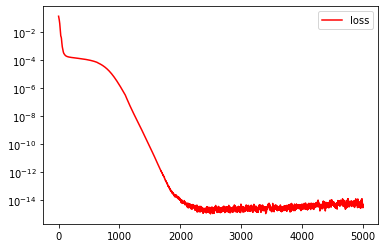

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.show()

In [9]:
#Save Trained Model
MLmodel_name = "NN_Model"#_Valid_" + trainingset["PreProcessMode"]
model.save(ML_Model_Path + '/' + MLmodel_name + '.h5')
#model.save(ML_Model_Path + MLmodel_name, save_format='tf')

In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + '/datasetSettings' +'.p', "wb"))

In [11]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 0
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[ 6.08519165e-03  8.29187653e-02  8.79194633e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.54469775e-05  1.65820044e-01 -2.30086438e-07
  1.00000000e+00  1.10000000e-01  1.08291002e+00 -1.31001769e-07
 -2.00022338e-01  1.08291002e+00 -1.31001769e-07 -2.00022338e-01
  8.29100222e-02 -1.31001769e-07  1.10000000e-01  8.29100222e-02
 -1.31001769e-07  1.10000000e-01  8.29100222e-02 -1.31001769e-07
 -2.00022338e-01  8.29100222e-02 -1.31001769e-07 -2.00022338e-01
 -9.17089978e-01 -1.31001769e-07  1.10000000e-01 -9.17089978e-01
 -1.31001769e-07  4.10000000e-01  3.82910022e-01 -1.31001769e-07
  1.10000000e-01  3.82910022e-01 -1.31001769e-07  1.10000000e-01
  8.29100222e-02 -1.31001769e-07  4.10000000e-01  8.29100222e-02
 -1.31001769e-07  4.10000000e-01  8.29100222e-02 -1.31001769e-07
  1.10000000e-01  8.29100222e-02 -1.31001769e-07  1.10000000e-01
 -2.17089978e-01 -1.31001769e-07  4.10000000e-01 -2.17089978e-01
 -1.31001769e-07  7.10000

Data Kept Original Form, But need to scale back to meters
[1.63292695e-07 1.67948192e-07 1.91456285e-07 2.14026591e-07
 2.60227714e-07 2.72158397e-07]
Error Mean:  2.1151831229331064e-07
Error Std 4.219531505242068e-08


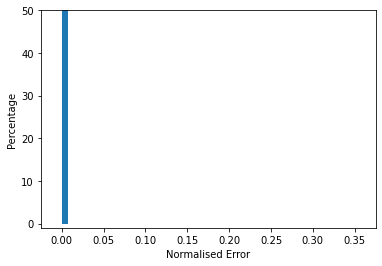

In [12]:
#Error Stat with Training Set
import matplotlib.pyplot as plt

y_pred_train = model.predict(x_train)


if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_train_originalform-y_pred_train_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-300:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

In [13]:
# #Error Stat with Validation Set

# y_pred_valid = model.predict(x_valid)


# if validationset["PreProcessMode"] == "OriginalForm":
#     print("Data Kept Original Form, But need to scale back to meters")
#     y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
#     y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
# elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
#     print("PreProcessing of: ", validationset["PreProcessMode"])
#     y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
#     y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
# else:
#     raise Exception("Unknow Pre Process Mode")

# #Compute Error
# err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

# #Plot Histogram
# fig=plt.figure();   ax = fig.gca()
# plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
# ax.set_xlabel("Normalised Error")
# ax.set_xlim([-0.025,0.375])
# ax.set_ylabel("Percentage")
# ax.set_ylim([-1,50])

# #### Sort the error

# err_sorted = np.sort(err)
# print(err_sorted)  # print the 100 biggest error

# print("Error Mean: ", err_sorted.mean())
# print("Error Std", err_sorted.std())

In [14]:
# #Error Stat with Test Set

# y_pred_test = model.predict(x_test)


# if testset["PreProcessMode"] == "OriginalForm":
#     print("Data Kept Original Form, But need to scale back to meters")
#     y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
#     y_true_test_originalform = y_test/testset["VectorScaleFactor"]
# elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
#     print("PreProcessing of: ", validationset["PreProcessMode"])
#     y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
#     y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
# else:
#     raise Exception("Unknow Pre Process Mode")

# #Compute Error
# err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

# #Plot Histogram
# fig=plt.figure();   ax = fig.gca()
# plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
# ax.set_xlabel("Normalised Error")
# ax.set_xlim([-0.025,0.375])
# ax.set_ylabel("Percentage")
# ax.set_ylim([-1,50])

# #### Sort the error

# err_sorted = np.sort(err)
# print(err_sorted)  # print the 100 biggest error

# print("Error Mean: ", err_sorted.mean())
# print("Error Std", err_sorted.std())